In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential
from sklearn.metrics import mean_squared_error

In [15]:
# Load training dataset
dataset_train = pd.read_csv('trainset.csv')
train_set = dataset_train.iloc[:, 1:2].values

In [16]:
# Scale the training set
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(train_set)

In [17]:
# Prepare training data with a window of 60 time steps
X_train_array = []
y_train_array = []
for i in range(60, 1259):
    X_train_array.append(training_set_scaled[i-60:i, 0])
    y_train_array.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Define and compile the model
length = 60
n_features = 1
model = Sequential()
model.add(layers.SimpleRNN(50, input_shape=(length, n_features)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
print("Sarankumar J")
print("212221230087")
model.summary()

Sarankumar J
212221230087
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Train the model
model.fit(X_train1, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 2s 11ms/step - loss: 0.0137
Epoch 2/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0014
Epoch 3/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 4/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0010
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 9.1213e-04
Epoch 6/100
38/38 [==============================] - 0s 11ms/step - loss: 9.0694e-04
Epoch 7/100
38/38 [==============================] - 0s 10ms/step - loss: 7.1613e-04
Epoch 8/100
38/38 [==============================] - 0s 10ms/step - loss: 6.7053e-04
Epoch 9/100
38/38 [==============================] - 0s 11ms/step - loss: 6.6767e-04
Epoch 10/100
38/38 [==============================] - 0s 10ms/step - loss: 5.9723e-04
Epoch 11/100
38/38 [==============================] - 0s 11ms/step - loss: 5.3839e-04
Epoch 12/100
38/38 [==============================] - 0s 10ms/step - loss: 5.65

In [21]:
# Test Data
dataset_test = pd.read_csv('testset.csv')
test_set = dataset_test.iloc[:, 1:2].values

In [22]:
# Combine training and test set for preparing inputs
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total.values
inputs = inputs.reshape(-1, 1)
inputs_scaled = sc.transform(inputs)

In [23]:
X_test = []
y_test = []
for i in range(60, 1384):
    X_test.append(inputs_scaled[i-60:i, 0])
    y_test.append(inputs_scaled[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
# Make predictions on the test data
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 4ms/step


Sarankumar J
212221230087


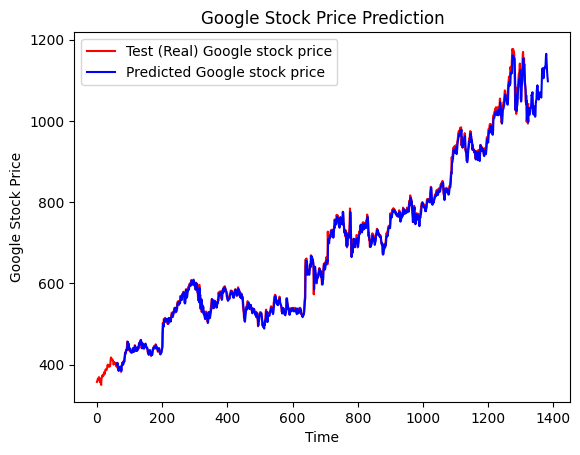

In [25]:
print("Sarankumar J")
print("212221230087")

plt.plot(np.arange(0, 1324), inputs[:1324], color='red', label='Test (Real) Google stock price')
plt.plot(np.arange(60, 1384), predicted_stock_price, color='blue', label='Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()